In [1]:
from capymoa.base import MOAClusterer
from capymoa.stream.generator import RandomRBFGeneratorDrift
from moa.clusterers.clustream import Clustream
from capymoa.evaluation.visualization import plot_clustering_state

In [2]:
stream = RandomRBFGeneratorDrift(number_of_attributes=2, number_of_centroids=10, number_of_drifting_centroids=1, magnitude_of_change=0.001)
clustream = MOAClusterer(schema=stream.get_schema(), moa_learner=Clustream, CLI="-k 10")

Processed 100 instances.


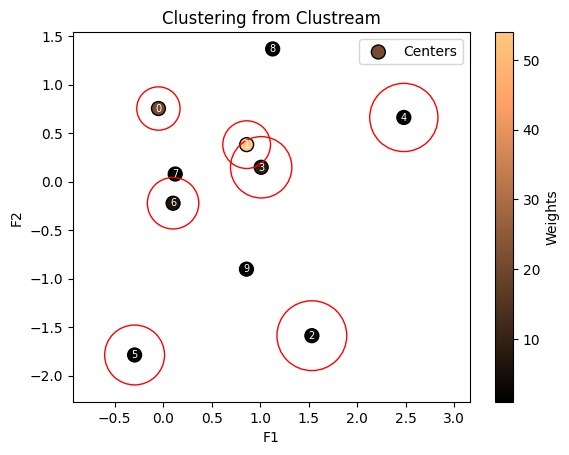

Processed 200 instances.


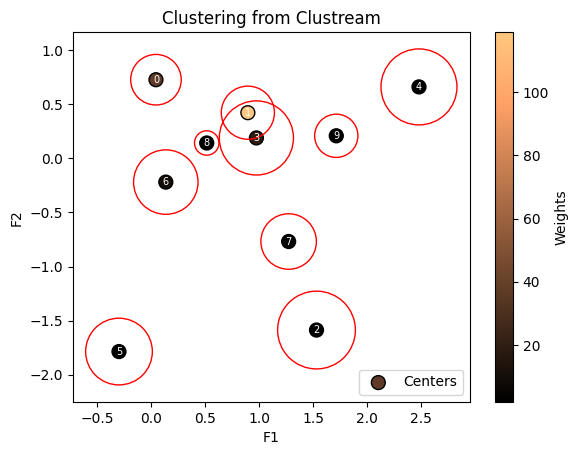

Processed 300 instances.


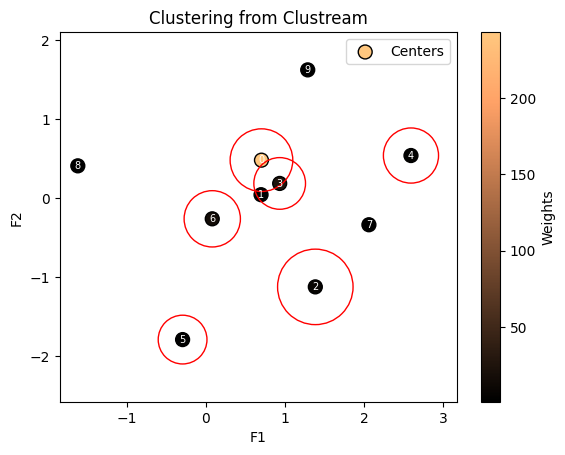

Processed 400 instances.


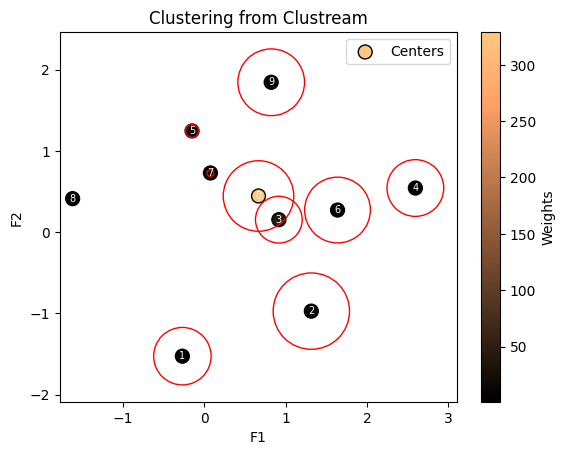

Processed 500 instances.


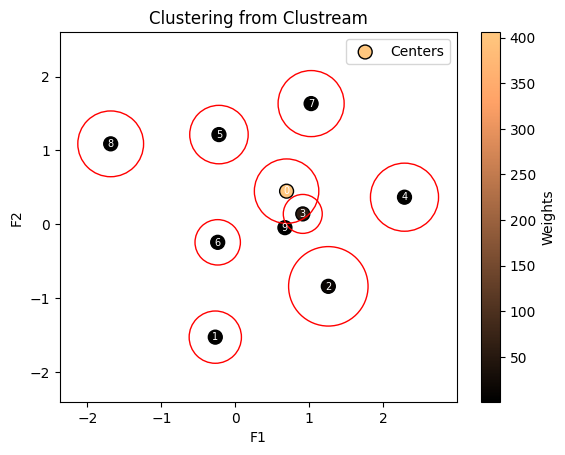

Processed 600 instances.


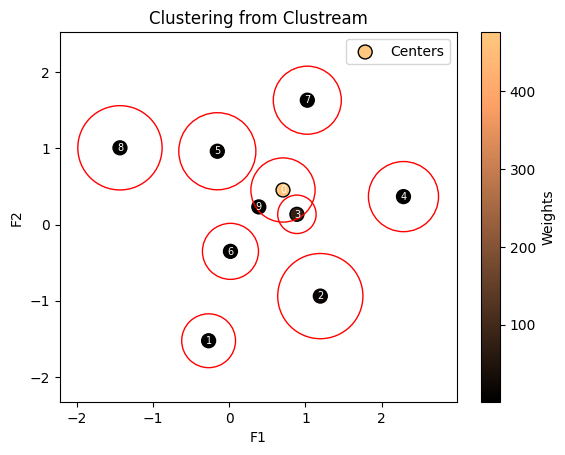

Processed 700 instances.


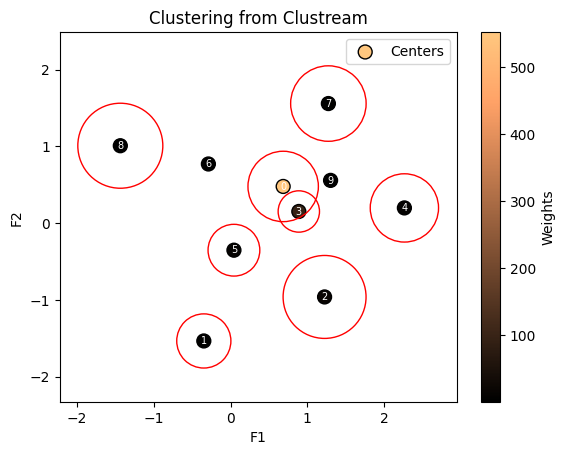

Processed 800 instances.


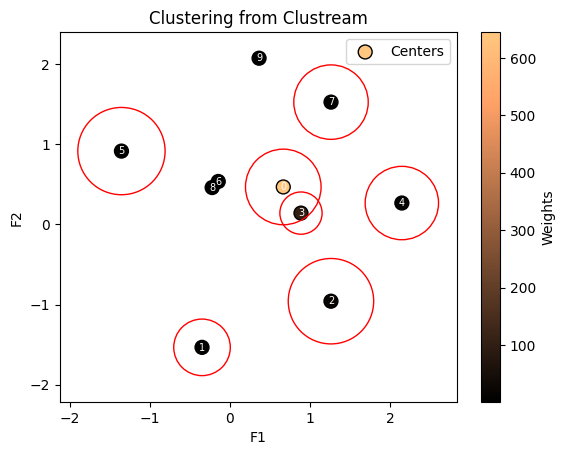

Processed 900 instances.


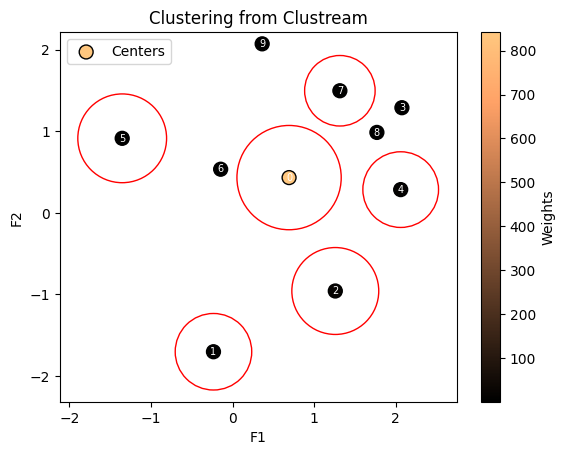

Processed 1000 instances.


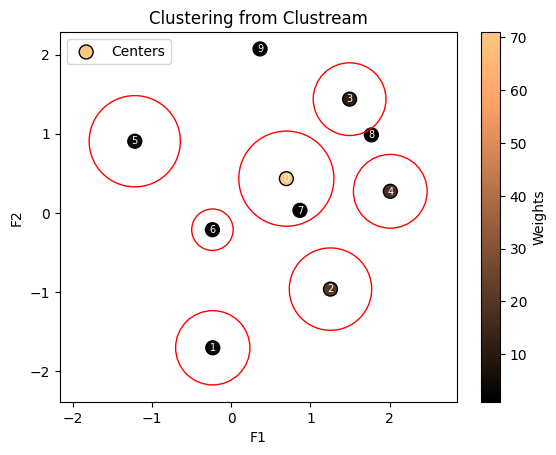

In [3]:
instancesSeen = 0
updateInterval = 100
while stream.has_more_instances() and instancesSeen < 1000:
    instance = stream.next_instance()
    clustream.train(instance)
    instancesSeen += 1
    if instancesSeen % updateInterval == 0:
        print(f"Processed {instancesSeen} instances.")
        plot_clustering_state(clustream)

---
## Brainstorm

In [4]:




stream = Electricity()

clustream = Clustream(schema=stream.get_schema())

evaluator = ClustererEvaluator(..., ...)



grace_period = 100

while stream.has_more_instances(): 
    
    instance = stream.next_instance()
    
    clustream.train(instance)
    # cluster_that_this_belongs_to_ID = clustream.cluster_assignment(instance) # also updates micro-cluster with y information

    evaluator.update(instance, clustream)
    # clustream.cluster_assignment(instance.X) --> update the purity of given micro-cluster? 

    # evaluator.micro_clusters_purity_assignments -> 0: [0,1,0,0,0,1], 12: [0,0,0], 32: [1,1,1,0]
    

    if i % grace_period == 0:
        evaluator.get_metrics(clustream)


NameError: name 'Electricity' is not defined

In [ ]:

stream = Electricity()
clustream = Clustream(schema=stream.get_schema())

grace_period = 100
while stream.has_more_instances(): 
    instance = stream.next_instance()
    clustream.train(instance)

plot_clusters(clustream)

In [ ]:


import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.datasets import load_iris
from scipy.stats import mode

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Function to calculate purity
def purity_score(y_true, y_pred):
    # Compute confusion matrix
    contingency_matrix = np.array([[np.sum(y_pred[y_true == i] == j) for j in np.unique(y_pred)] for i in np.unique(y_true)])
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# Calculate purity
purity = purity_score(y, cluster_labels)
print(f'Purity: {purity}')

# Calculate other evaluation metrics
ari = adjusted_rand_score(y, cluster_labels)
nmi = normalized_mutual_info_score(y, cluster_labels)

print(f'Adjusted Rand Index: {ari}')
print(f'Normalized Mutual Information: {nmi}')


Purity: 0.8866666666666667
Adjusted Rand Index: 0.7163421126838476
Normalized Mutual Information: 0.7419116631817836


In [ ]:
# Clusterer:
#    train(instance: Instance)
# MOAClusterer(Clusterer)

# Clustream(MOAClusterer)
# ClustererEvaluator
#    __init__(grace_period=1000)
#    update(instance: LabeledInstance, clusterer: Clusterer, force_update: bool = False)
#        --> update internal grace_period to determine when to update metrics. 
#    sillhouette_score()

stream = Electricity()

clustream = Clustream(schema=stream.get_schema())

evaluator = ClustererEvaluator(..., calculate_purity=True)


grace_period = 100

while stream.has_more_instances(): 
    
    instance = stream.next_instance()
    
    clustream.train(instance)

    evaluator.update(instance, clustream) # store in ClustererEvaluator the mapping between instance (ID?) and label

    
    if i % grace_period == 0:
        evaluator.get_metrics(clustream)


class ClustererEvaluator:
    update(...)

    purity(self,...):
        # Implements the purity calculation given that calculate_purity==True

    silhouette_score(self, ...):
        MOA_evaluator.silhouette_score(...)
        
